# Лабораторная работа №4. КИХ-фильтры.


| Вариант                                                                	| 0    	| 1 	| 2 	| 3 	| 4 	| 5 	| 6 	|
|------------------------------------------------------------------------	|-----	|-----	|-----	|-----	|-----	|-----	|-----	|
| Частота дискретизации $f_s$ Гц                                         	| 2000	| 5000	| 5500	| 6000	| 6500	| 7000	| 7500	|
| граничная частота полосы пропускания $f_1$ Гц                          	| 450  	| 500 	| 650 	| 800 	| 950 	| 1100	| 1250	|
| граничная частота полосы задерживания $f_2$ Гц                         	| 550  	| 750 	| 925 	| 1100	| 1275	| 1450	| 1625	|
| максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$  	| 0.1  	| 0.05	| 0.05	| 0.05	| 0.05	| 0.05	| 0.05	|
| максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$ 	| 0.05 	| 0.02 	| 0.02	| 0.02	| 0.02	| 0.02	| 0.02	|

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.ticker as ticker

# Модуль 1. Метод частотной выборки синтеза КИХ-фильтров

## Задача 1.1. Синтез ФНЧ по идеальной АЧХ. 

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с частотой среза $f_c=(f_1+f_2)/2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. 

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику КИХ-фильтра. Определить по виду импульсной характеристики, будет ли фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

In [ ]:
def ideal_lowpass(f, f_c, fs):
    if 0 <= f <= f_c or fs-f_c <= f <=  fs:
        return 1.0 +0.0j
    else:
        return 0.0 +0.0j


In [ ]:
fs = 6000
f1 = 800
f2 = 1100
N = 29

fc = (f1 + f2) / 2
H = np.zeros (N, dtype=complex)
for n in range (N):
    H[n] = ideal_lowpass (fs * n / N, fc, fs) * np.exp (-2j * np.pi * (n / N) * ((N - 1) / 2.0))


In [ ]:
h = np.fft.ifft (H).real
M = 1024
H1 = np.fft.fft (h, M)

delta1 = 0
delta2 = 0
for m in range (len (H1)):
    if (m / M) > 0.5:
      break
    if (m / M) <= (f1 / fs) and abs (abs (H1[m]) - 1) > delta1:
        delta1 = abs (abs (H1[m]) - 1)
    if (m / M) >= (f2 / fs) and abs (H1[m]) > delta2:
        delta2 = abs (H1[m]) 
print ("delta1 = {}".format (delta1))
print ("delta2 = {}".format (delta2))


delta1 = 0.11993940333468944
delta2 = 0.16032173580514633


a) - $$δ_1 = 0.11993940333468944; δ_2 = 0.16032173580514633;$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'АЧХ')

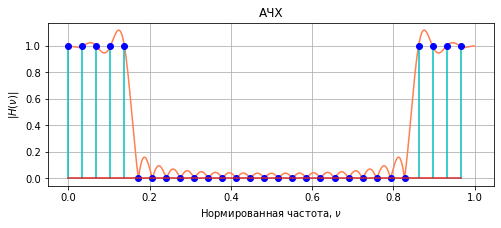

In [ ]:
plt.figure(figsize=[8, 3])
plt.plot(np.arange(M)/M, abs (H1), color='coral')
plt.stem(np.arange(N)/N, abs(np.fft.fft(h)), 'c', 'bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


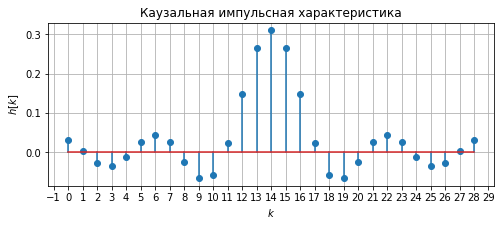

In [ ]:
plt.figure(figsize=[8, 3])
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()

в) - Фильтр симметричный, а N - нечётное, поэтому данный фильтр является КИХ фильтром первого типа. Следовательно, его групповая задержка будет постоянной и равной: $$\phi_g = \frac{N - 1}{2} = 14.$$
Про фазовую задержку можно сказать лишь, то что она будет постоянна в окрестности нуля.


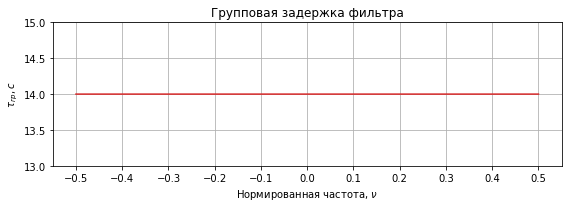

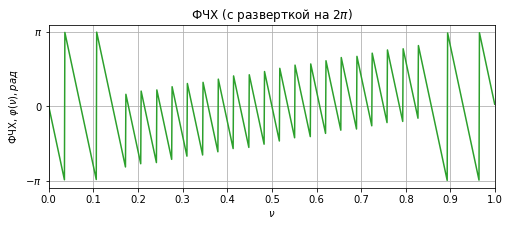

In [ ]:
delta=1e-6
nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=1)

plt.figure(figsize=[8, 3])
plt.title('Групповая задержка фильтра')
plt.plot(nu, gd*1, 'C3')
plt.ylabel('$\\tau_{{гр}}, c$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

plt.figure(figsize=[8, 3])
ax = plt.subplot(111)
H1=((np.fft.fft(h, M)))
plt.plot(np.arange(M)/M, np.angle(H1), color='C2')
plt.title("ФЧХ (с разверткой на $2\\pi$)")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.xlim([0, 1])
plt.yticks([-np.pi, 0, np.pi], labels=("$-\pi$", "0", "$\pi$"))
plt.xlabel('$\\nu$')
plt.ylabel('ФЧХ, $\\varphi(\\nu), рад$')
plt.grid()

## Задача 1.2. Синтез ФНЧ по непрерывной АЧХ.

Синтезировать КИХ-фильтр 28 порядка ($N=29$) на основе идеального фильтра нижних частот с граничной частотой полосы пропускания $f_1$ и с граничной частотой полосы задерживания $f_2$ методом частотной выборки. Частоту дискретизации принять равной $f_s$. Частотную характеристику идеального фильтра в полосе перехода аппроксимировать линейной функцией так, чтобы характеристика была непрерывной.

а) Определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатом в задаче 1.1.

б) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

в) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

г) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (в).

д) Определить частоту среза (по уровню $-3$ дБ) модельного и полученного фильтров. 

In [ ]:
def ideal_lowpass2(f, f1, f2, fs):
    if 0 <= f <= f1 or fs-f1 <= f <=  fs:
        return 1.0 +0.0j
    elif f1<f<f2: 
        return f/(f1-f2)+(f2/(f2-f1)) +0.0j
    elif fs-f2<f<fs-f1:
        return f/(f2-f1)+(fs-f2)/(-f2+f1) +0.0j
    else:
        return 0.0 +0.0j

In [ ]:
fs = 6000
f1 = 800
f2 = 1100
N = 29

fc = (f1 + f2) / 2
H = np.zeros (N, dtype=complex)
for n in range (N):
    H[n] = ideal_lowpass2 (fs * n / N, f1, f2, fs) * np.exp (-2j * np.pi * (n / N) * ((N - 1) / 2.0))


In [ ]:
h = np.fft.ifft (H).real
M = 65536
H1 = np.fft.fft (h, M)

delta1 = 0
delta2 = 0
for m in range (len (H1)):
    if (m / M) > 0.5:
      break
    if (m / M) <= (f1 / fs) and abs (abs (H1[m]) - 1) > delta1:
        delta1 = abs (abs (H1[m]) - 1)
    if (m / M) >= (f2 / fs) and abs (H1[m]) > delta2:
        delta2 = abs (H1[m]) 
print ("delta1 = {}".format (delta1))
print ("delta2 = {}".format (delta2))

delta1 = 0.04026895741778702
delta2 = 0.0626971805384065


а) - Как видно, данные значения меньше, чем в задаче №1.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'АЧХ')

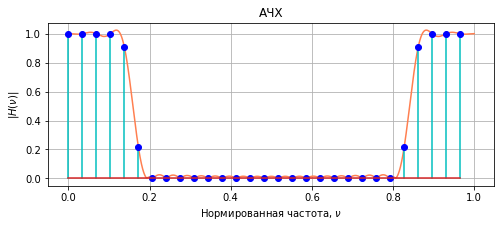

In [ ]:
plt.figure(figsize=[8, 3])
plt.plot(np.arange(M)/M, abs (H1), color='coral')
plt.stem(np.arange(N)/N, abs(np.fft.fft(h)), 'c', 'bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


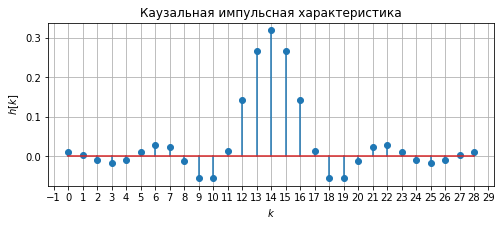

In [ ]:
plt.figure(figsize=[8, 3])
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()

в) - Фильтр симметричный, а N - нечётное, поэтому данный фильтр является КИХ фильтром первого типа. Следовательно, его групповая задержка будет постоянной и равной: $$\phi_g = \frac{N - 1}{2} = 14.$$
Про фазовую задержку можно сказать лишь, то что она будет постоянна в окрестности нуля.

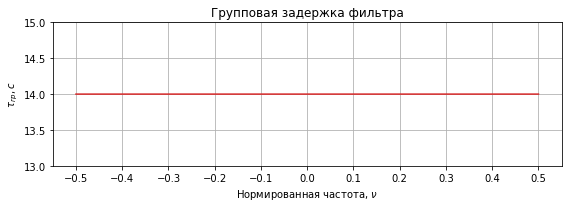

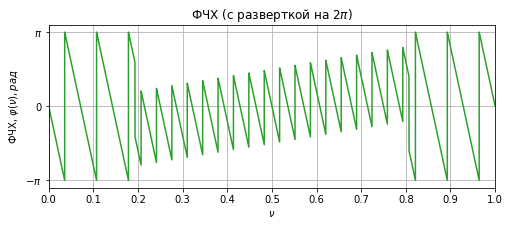

In [ ]:
delta=1e-6
nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=1)

plt.figure(figsize=[8, 3])
plt.title('Групповая задержка фильтра')
plt.plot(nu, gd*1, 'C3')
plt.ylabel('$\\tau_{{гр}}, c$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

plt.figure(figsize=[8, 3])
ax = plt.subplot(111)
H1=((np.fft.fft(h, M)))
plt.plot(np.arange(M)/M, np.angle(H1), color='C2')
plt.title("ФЧХ (с разверткой на $2\\pi$)")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.xlim([0, 1])
plt.yticks([-np.pi, 0, np.pi], labels=("$-\pi$", "0", "$\pi$"))
plt.xlabel('$\\nu$')
plt.ylabel('ФЧХ, $\\varphi(\\nu), рад$')
plt.grid()

д) - Для модельного фильтра частота среза равна просто:
$$f_c = f_2 - \frac{f_2 - f_1}{\sqrt {2}} = 887.2 \text{ Гц}$$

In [ ]:
delta = 1
m_target = 0
for m in range (len (H1)):
  if m / M > 0.5:
    break 
  if abs (abs (H1[m]) - 1 / np.sqrt (2)) < delta:
      delta = abs (abs (H1[m]) - 1 / np.sqrt (2))
      m_target = m

print ("f_c = {} Гц".format (fs * m_target / M))


f_c = 898.13232421875 Гц


## Задача 1.3*. Синтез фильтра с характеристикой «приподнятый косинус»

Синтезировать КИХ-фильтр 28 порядка ($N=29$) с частотой среза $f_c=(f_1+f_2)/2$  на основе фильтра приподнятого косинуса методом частотной выборки. Частоту дискретизации принять равной $f_s$. На интервале $[-f_s/2, f_s/2]$ частотная характеристика фильтра задается следующим образом 

$$H(f)=\left\{ \begin{matrix}
   1, & |f| < (1-\beta)f_c;\\
   \dfrac{1}{2}*\left( 1+\cos \left(\pi \dfrac{|f|-(1-\beta)f_c}{2\beta f_c} \right) \right), & (1-\beta) f_c \le |f| \le (1+\beta)f_c;  \\
   0,   &  |f| <(1+\beta)f_c. \\
\end{matrix} \right.$$

а) Подобрать такое $\beta$, чтобы модельный фильтр не выходил за максимально допустимые отклонения АЧХ в полосе пропускания и в полосе задерживания ($\delta_1$ и $\delta_2$). Изобразить полученную АЧХ фильтра.

б) Для синтезированного фильтра определить максимальные уровни пульсаций $\delta_1$ и $\delta_2$ в полосе пропускания и в полосе задерживания. Сравнить с результатами в задаче 1.1 и задаче 1.2.

в) Изобразить на одном графике АЧХ фильтра и отсчеты ДПФ. 

г) Построить импульсную характеристику полученного КИХ-фильтра. Определить по виду импульсной характеристики, будет ли 
фильтр обладать постоянной фазовой и группой задержками.

д) Получить график для групповой задержки фильтра. Сравнить с выводом в пункте (г).

е) Определить частоту среза (по уровню $-3$ дБ) полученного фильтра. Сравнить с задачей 1.2.


In [ ]:
def raised_cos (f, fc, fs, beta):
    fc_plus = (1 + beta) * fc
    fc_minus = (1 - beta) * fc
    if 0 <= f <= fc_minus or fs - fc_minus <= f <=  fs:
        return 1.0 +0.0j
    elif fc_minus < f < fc_plus: 
        return 0.5 * (1 + np.cos (np.pi * (f - fc_minus) / (2 * beta * fc))) + 0.0j
    elif fs - fc_plus < f < fs - fc_minus:
        return 0.5 * (1 + np.cos (np.pi * (fs - f - fc_minus) / (2 * beta * fc))) + 0.0j     
    else:
        return 0.0 + 0.0j

In [ ]:
fs = 6000
f1 = 800
f2 = 1100
N = 401
delta1 = 0.05
delta2 = 0.02

fc = (f1 + f2) / 2
H = np.zeros (N, dtype=complex)
beta = 0.2
for n in range (N):
    H[n] = raised_cos (fs * n / N, fc, fs, beta) * np.exp (-2j * np.pi * (n / N) * ((N - 1) / 2.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'АЧХ')

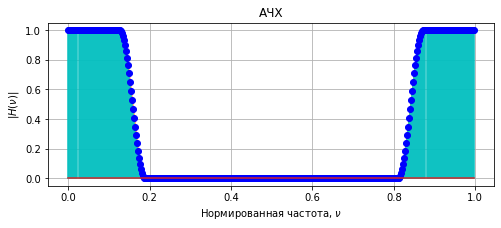

In [ ]:
plt.figure(figsize=[8, 3])
plt.plot(np.arange(N)/N, abs (H), color='coral')
plt.stem(np.arange(N)/N, abs (H), 'c', 'bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')

In [ ]:

delta_real1 = 0
delta_real2 = 0
for m in range (len (H)):
    if (m / N) > 0.5:
      break
    if (m / N) <= (f1 / fs) and 1 - abs (H[m]) > delta_real1:
        delta_real1 = 1 - abs (H[m])
    if (m / N) >= (f2 / fs) and abs (H[m]) > delta_real2:
        delta_real2 = abs (H[m])       
print ("delta1 = {}".format (delta_real1))
print ("delta2 = {}".format (delta_real2))

delta1 = 0.018512346488558373
delta2 = 0.018235465808517093


In [ ]:
fs = 6000
f1 = 800
f2 = 1100
N = 29
delta1 = 0.05
delta2 = 0.02

fc = (f1 + f2) / 2
H = np.zeros (N, dtype=complex)
beta = 0.2
for n in range (N):
    H[n] = raised_cos (fs * n / N, fc, fs, beta) * np.exp (-2j * np.pi * (n / N) * ((N - 1) / 2.0))

In [ ]:
h = np.fft.ifft (H).real
M = 65536
H1 = np.fft.fft (h, M)

delta1 = 0
delta2 = 0
for m in range (len (H1)):
    if (m / M) > 0.5:
      break
    if (m / M) <= (f1 / fs) and abs (abs (H1[m]) - 1) > delta1:
        delta1 = abs (abs (H1[m]) - 1)
    if (m / M) >= (f2 / fs) and abs (H1[m]) > delta2:
        delta2 = abs (H1[m]) 
print ("delta1 = {}".format (delta1))
print ("delta2 = {}".format (delta2))

delta1 = 0.039412454676540865
delta2 = 0.03754967799927766


б) - Результат лучше чем в задаче №1 и задаче №2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'АЧХ')

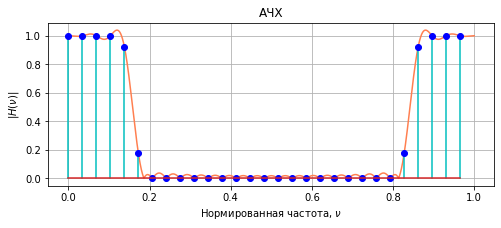

In [ ]:
plt.figure(figsize=[8, 3])
plt.plot(np.arange(M)/M, abs (H1), color='coral')
plt.stem(np.arange(N)/N, abs(np.fft.fft(h)), 'c', 'bo')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.title('АЧХ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


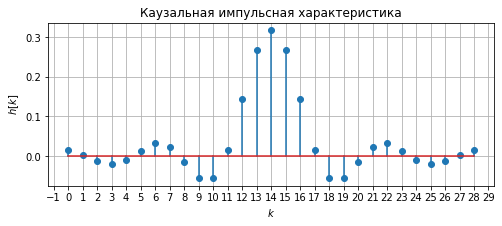

In [ ]:
plt.figure(figsize=[8, 3])
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()

г) - Фильтр симметричный, а N - нечётное, поэтому данный фильтр является КИХ фильтром первого типа. Следовательно, его групповая задержка будет постоянной и равной: $$\phi_g = \frac{N - 1}{2} = 14.$$
Про фазовую задержку можно сказать лишь, то что она будет постоянна в окрестности нуля.

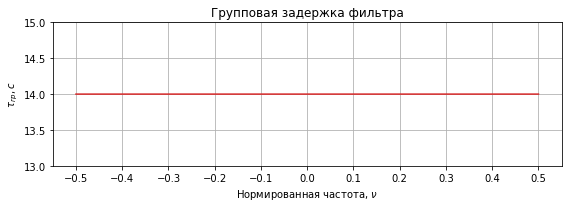

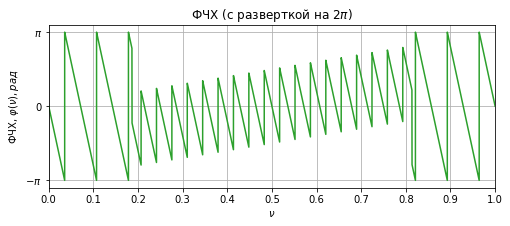

In [ ]:
delta=1e-6
nu, gd = signal.group_delay((h, [1]), w=np.linspace(-0.5+delta, 0.5-delta, num=2048), fs=1)

plt.figure(figsize=[8, 3])
plt.title('Групповая задержка фильтра')
plt.plot(nu, gd*1, 'C3')
plt.ylabel('$\\tau_{{гр}}, c$')
plt.xlabel('Нормированная частота, $\\nu$')
plt.ylim([min(gd)-1, max(gd)+1])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.tight_layout()

plt.figure(figsize=[8, 3])
ax = plt.subplot(111)
H1=((np.fft.fft(h, M)))
plt.plot(np.arange(M)/M, np.angle(H1), color='C2')
plt.title("ФЧХ (с разверткой на $2\\pi$)")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.xlim([0, 1])
plt.yticks([-np.pi, 0, np.pi], labels=("$-\pi$", "0", "$\pi$"))
plt.xlabel('$\\nu$')
plt.ylabel('ФЧХ, $\\varphi(\\nu), рад$')
plt.grid()

In [ ]:
delta = 1
m_target = 0
for m in range (len (H1)):
  if m / M > 0.5:
    break 
  if abs (abs (H1[m]) - 1 / np.sqrt (2)) < delta:
      delta = abs (abs (H1[m]) - 1 / np.sqrt (2))
      m_target = m

print ("f_c = {} Гц".format (fs * m_target / M))

f_c = 897.5830078125 Гц


Частота среза чуть меньше чем в пункте 1.2. Что даже ближе к соответствующему значению из линейной аппроксимации.



#  Модуль 2. Метод окон для синтеза КИХ-фильтров

### Задача 2.1. Сравнение АЧХ фильтров одного порядка 
Синтезировать КИХ-фильтры нижних частот c частотой среза $f_c$ при частоте дискретизации $f_s$ порядка $R=28$ ($N=29$) с использованием следующих окон:

* прямоугольное (окно Дирихле)
$$w[k]=\left\{ \begin{matrix}
   1,  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

* окно Ханна 
$$w[k]=\left\{ \begin{matrix}
   0,5-0,5\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Хэмминга
$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

* окно Блэкмана
$$w[k]=\left\{ \begin{matrix}
   0,42-0,5\cos \dfrac{2\pi k}{N-1}+0,08\cos \dfrac{4\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

Построить графики оконной функции $w[k]$, импульсной характеристики КИХ-фильтра $h[k]$, АЧХ КИХ-фильтра(в линейном масштабе и в дБ). Определить по графикам максимальный уровень пульсаций по полосе задерживания в дБ. Заполнить таблицу.

|Окно, применяемое для синтеза фильтра |Частота среза, по уровню -3дБ, Гц |Максимальный уровень пульсаций, дБ | Ширина переходной зоны, Гц |
|:-------:|:-|:-|:-|
|Дирихле  |908.2|-20|2295|
|Ханна    |855.5|-44|559|
|Хэмминга |867|-52|542|
|Блэкмана |838|-75|711|



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


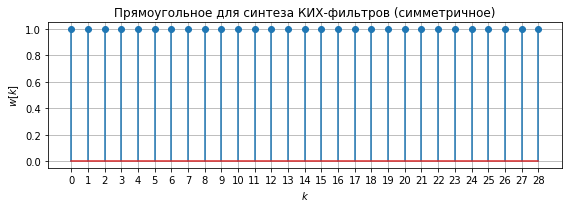

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.ticker as ticker


fs = 6000
f1 = 800
f2 = 1100
N = 29
delta1 = 0.05
delta2 = 0.02

cutoff=(f1+f2)/2
w = signal.windows.boxcar(M=N, sym=True)
plt.figure(figsize=[8, 3])
plt.stem(np.arange(w.size),w)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.title("Прямоугольное для синтеза КИХ-фильтров (симметричное)")
plt.xticks(np.arange(w.size))
plt.tight_layout()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


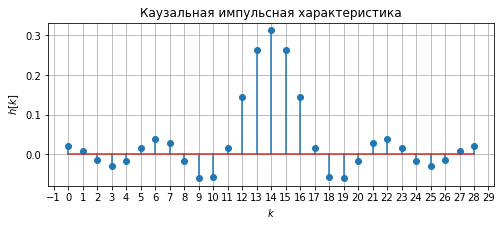

In [ ]:
h = signal.firwin(numtaps=N, cutoff=cutoff, width=None, window='boxcar', pass_zero='lowpass', fs=fs)
plt.figure(figsize=[8, 3])
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()

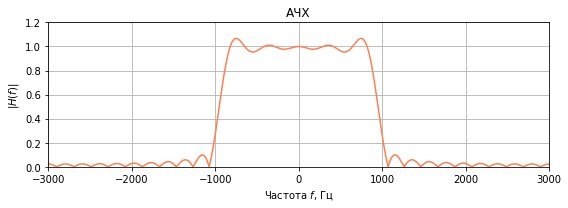

In [ ]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.tight_layout()
plt.show()

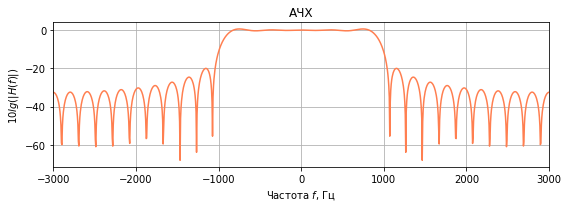

In [ ]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), 20 * np.log10 (H1), color='coral')
plt.grid()
plt.ylabel('$10 lg(|H(f)|)$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.tight_layout()
plt.show()

In [ ]:
delta = 1
m_target = 0
H1_new=abs(np.fft.fft(h, M))
for m in range (len (H1)):
  if m / M > 0.5:
    break
  if abs (abs (H1_new[m]) - 1 / np.sqrt (2)) < delta:
      delta = abs (abs (H1_new[m]) - 1 / np.sqrt (2))
      m_target = m

print ("f_c = {} Гц".format (fs * m_target / M))

f_c = 908.203125 Гц


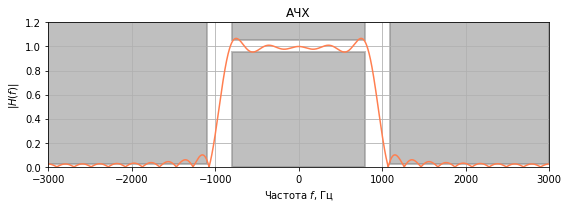

In [ ]:
M = 65536
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
f_touch1 = 0
f_touch2 = 0
frequencies = fs*(np.arange(M)/M-0.5)
is_touch1 = False   
      

for m in range (len (H1)):
    if m / M < 0.5:
        continue 
    if (abs (H1[m]) > 1 + delta1 or abs (H1[m]) < 1 - delta1) and not is_touch1:
        f_touch1 = frequencies[m]
        is_touch1 = True
    if abs (H1[m]) > delta2:
        f_touch2 = frequencies[m]      
      


print ("F1 = {}".format (f_touch1))
print ("F2 = {}".format (f_touch2))
print ("Transition zone = {}".format (f_touch2 - f_touch1))

F1 = 705.322265625
F2 = 2999.908447265625
Transition zone = 2294.586181640625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


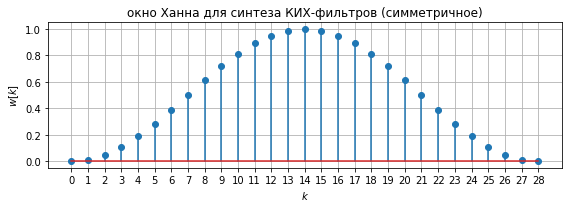

In [ ]:
w = signal.windows.hann(M=N, sym=True)
plt.figure(figsize=[8, 3])
plt.stem(np.arange(w.size),w)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.title("окно Ханна для синтеза КИХ-фильтров (симметричное)")
plt.xticks(np.arange(w.size))
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


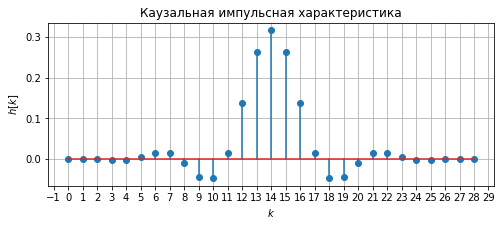

In [ ]:
h = signal.firwin(numtaps=N, cutoff=cutoff, width=None, window='hann', pass_zero='lowpass', fs=fs)
plt.figure(figsize=[8, 3])
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()

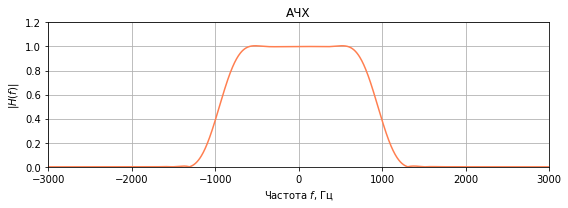

In [ ]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.tight_layout()
plt.show()

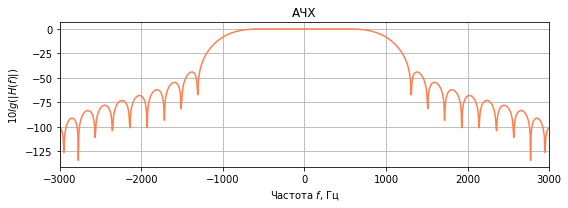

In [ ]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), 20 * np.log10 (H1), color='coral')
plt.grid()
plt.ylabel('$10 lg(|H(f)|)$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.tight_layout()
plt.show()

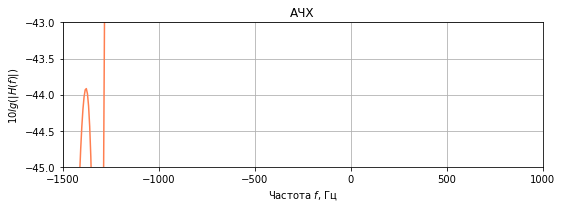

In [ ]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), 20 * np.log10 (H1), color='coral')
plt.grid()
plt.ylabel('$10 lg(|H(f)|)$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-1500, 1000])
plt.ylim([-45, -43])
plt.tight_layout()
plt.show()

In [ ]:
delta = 1
m_target = 0
H1_new=abs(np.fft.fft(h, M))
for m in range (len (H1)):
  if m / M > 0.5:
    break
  if abs (abs (H1_new[m]) - 1 / np.sqrt (2)) < delta:
      delta = abs (abs (H1_new[m]) - 1 / np.sqrt (2))
      m_target = m

print ("f_c = {} Гц".format (fs * m_target / M))

f_c = 855.46875 Гц


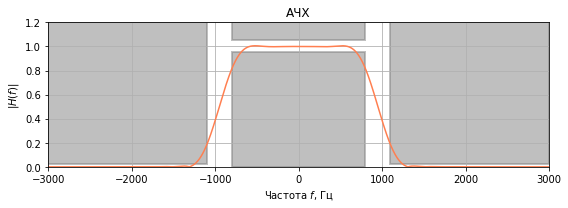

In [ ]:
M = 65536
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
f_touch1 = 0
f_touch2 = 0
frequencies = fs*(np.arange(M)/M-0.5)
is_touch1 = False   
      

for m in range (len (H1)):
    if m / M < 0.5:
        continue 
    if (abs (H1[m]) > 1 + delta1 or abs (H1[m]) < 1 - delta1) and not is_touch1:
        f_touch1 = frequencies[m]
        is_touch1 = True
    if abs (H1[m]) > delta2:
        f_touch2 = frequencies[m]      
      


print ("F1 = {}".format (f_touch1))
print ("F2 = {}".format (f_touch2))
print ("Transition zone = {}".format (f_touch2 - f_touch1))


F1 = 692.68798828125
F2 = 1251.89208984375
Transition zone = 559.2041015625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


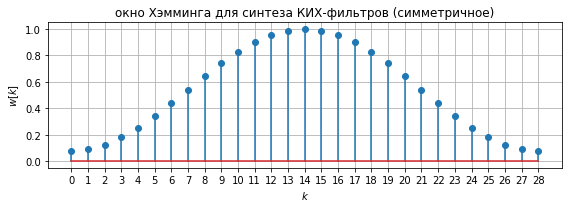

In [ ]:
w = signal.windows.hamming(M=N, sym=True)
plt.figure(figsize=[8, 3])
plt.stem(np.arange(w.size),w)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.title("окно Хэмминга для синтеза КИХ-фильтров (симметричное)")
plt.xticks(np.arange(w.size))
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


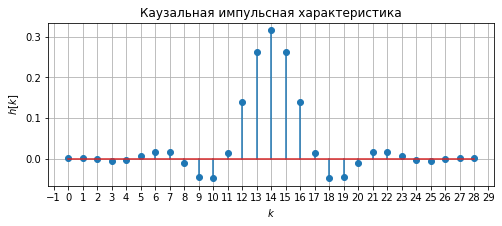

In [ ]:
h = signal.firwin(numtaps=N, cutoff=cutoff, width=None, window='hamming', pass_zero='lowpass', fs=fs)
plt.figure(figsize=[8, 3])
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()

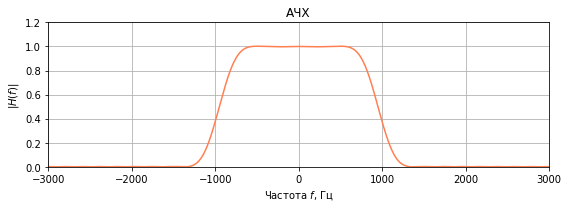

In [ ]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.tight_layout()
plt.show()

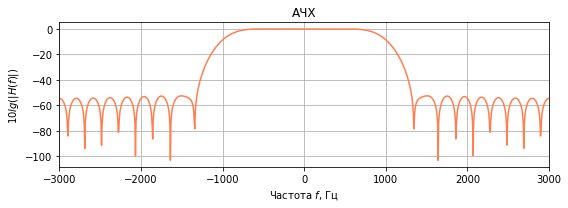

In [ ]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), 20 * np.log10 (H1), color='coral')
plt.grid()
plt.ylabel('$10 lg(|H(f)|)$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.tight_layout()
plt.show()

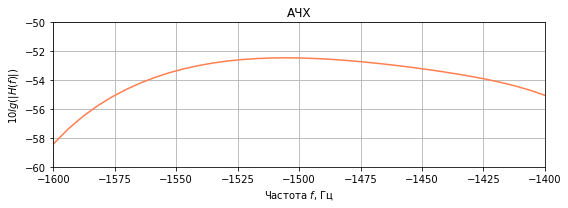

In [ ]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), 20 * np.log10 (H1), color='coral')
plt.grid()
plt.ylabel('$10 lg(|H(f)|)$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-1600, -1400])
plt.ylim([-60, -50])
plt.tight_layout()
plt.show()

In [ ]:
delta = 1
m_target = 0
H1_new=abs(np.fft.fft(h, M))
for m in range (len (H1)):
  if m / M > 0.5:
    break
  if abs (abs (H1_new[m]) - 1 / np.sqrt (2)) < delta:
      delta = abs (abs (H1_new[m]) - 1 / np.sqrt (2))
      m_target = m

print ("f_c = {} Гц".format (fs * m_target / M))

f_c = 867.1875 Гц


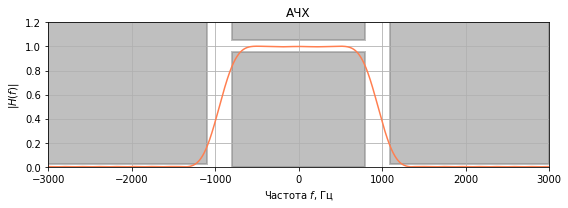

In [ ]:
M = 65536
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
f_touch1 = 0
f_touch2 = 0
frequencies = fs*(np.arange(M)/M-0.5)
is_touch1 = False   
      

for m in range (len (H1)):
    if m / M < 0.5:
        continue 
    if (abs (H1[m]) > 1 + delta1 or abs (H1[m]) < 1 - delta1) and not is_touch1:
        f_touch1 = frequencies[m]
        is_touch1 = True
    if abs (H1[m]) > delta2:
        f_touch2 = frequencies[m]      
      


print ("F1 = {}".format (f_touch1))
print ("F2 = {}".format (f_touch2))
print ("Transition zone = {}".format (f_touch2 - f_touch1))

F1 = 702.667236328125
F2 = 1244.659423828125
Transition zone = 541.9921875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


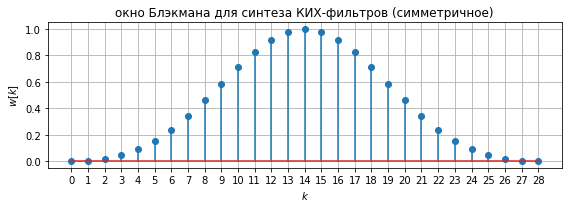

In [ ]:
w = signal.windows.blackman(M=N, sym=True)
plt.figure(figsize=[8, 3])
plt.stem(np.arange(w.size),w)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.title("окно Блэкмана для синтеза КИХ-фильтров (симметричное)")
plt.xticks(np.arange(w.size))
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


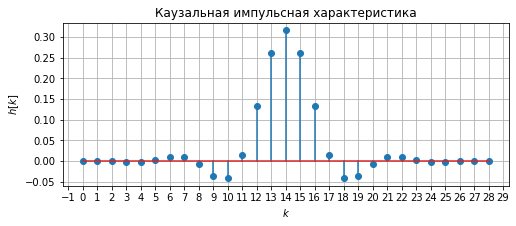

In [ ]:
h = signal.firwin(numtaps=N, cutoff=cutoff, width=None, window='blackman', pass_zero='lowpass', fs=fs)
plt.figure(figsize=[8, 3])
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(np.arange(N), h)
plt.xlabel('$k$')
plt.ylabel('$h[k]$')
plt.title("Каузальная импульсная характеристика")
plt.grid()

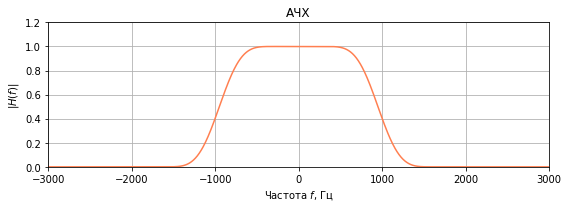

In [ ]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.tight_layout()
plt.show()

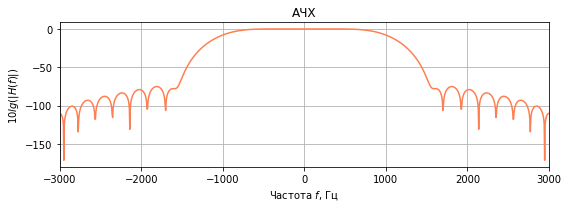

In [ ]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), 20 * np.log10 (H1), color='coral')
plt.grid()
plt.ylabel('$10 lg(|H(f)|)$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.tight_layout()
plt.show()

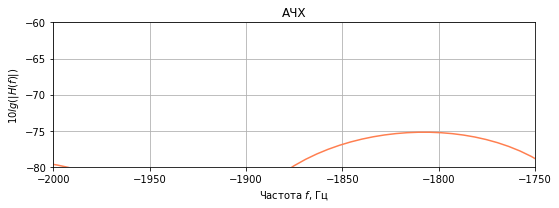

In [ ]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), 20 * np.log10 (H1), color='coral')
plt.grid()
plt.ylabel('$10 lg(|H(f)|)$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-2000, -1750])
plt.ylim([-80, -60])
plt.tight_layout()
plt.show()

In [ ]:
delta = 1
m_target = 0
H1_new=abs(np.fft.fft(h, M))
for m in range (len (H1)):
  if m / M > 0.5:
    break
  if abs (abs (H1_new[m]) - 1 / np.sqrt (2)) < delta:
      delta = abs (abs (H1_new[m]) - 1 / np.sqrt (2))
      m_target = m

print ("f_c = {} Гц".format (fs * m_target / M))

f_c = 837.890625 Гц


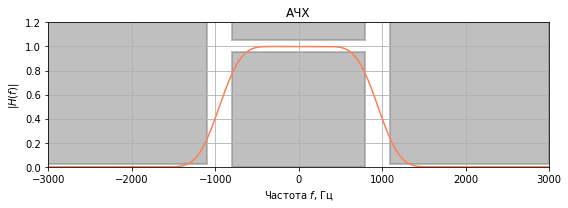

In [ ]:
M = 65536
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
f_touch1 = 0
f_touch2 = 0
frequencies = fs*(np.arange(M)/M-0.5)
is_touch1 = False   
      

for m in range (len (H1)):
    if m / M < 0.5:
        continue 
    if (abs (H1[m]) > 1 + delta1 or abs (H1[m]) < 1 - delta1) and not is_touch1:
        f_touch1 = frequencies[m]
        is_touch1 = True
    if abs (H1[m]) > delta2:
        f_touch2 = frequencies[m]      
      


print ("F1 = {}".format (f_touch1))
print ("F2 = {}".format (f_touch2))
print ("Transition zone = {}".format (f_touch2 - f_touch1))

F1 = 629.425048828125
F2 = 1339.9658203125
Transition zone = 710.540771484375


### Задача 2.2. Синтез ФНЧ с окном Хемминга. 

Синтезировать КИХ-фильтр нижних частот с окном Хемминга наименьшего порядка при заданных требованиях к АЧХ:
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Воспользоваться следующей итерационной процедурой [1]:

1) Оценить длину окна по формуле 

$$\hat{N}=\left[\dfrac{3,3 f_s}{\Delta f} \right], \;\;  \Delta f=f_2-f_1$$

2) Взвесить импульсную характеристику идеального фильтра c ФЧХ $\varphi(\theta)=- \dfrac{R}{2} \theta$ окном Хэмминга выбранной длины (``scipy.firwin``, $f_c=(f_1+f_2)/2$).

$$h[k]=\left\{ \begin{matrix}
   {{h}_{\text{ideal}}}[k]w[k],  \\
   0,  \\
\end{matrix}\begin{matrix}
   \ \ 0\le k\le N-1;  \\
   \left\{ k<0 \right\}\cup \left\{ k\ge N \right\}.  \\
\end{matrix} \right.$$

$$w[k]=\left\{ \begin{matrix}
   0,54-0,46\cos \dfrac{2\pi k}{N-1}, & 0\le k\le N-1;  \\
   0, &\left\{ k<0 \right\}\cup \left\{ k\ge N \right\}. \\
\end{matrix} \right.$$

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выполняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Проверку требований к АЧХ можно произвести по графику, используя
* backend notebook `%matplotlib notebook` (в Jupyter Notebook)
* `plt.xlim()` и `plt.ylim()` (в Google Colab или в Jupyter Notebook)

Приведите графики АЧХ КИХ-фильтра с начальным ($\hat{R}=\hat{N}-1$) и конечным $R_\min$ порядками в итерационной процедуре. 
______

[1] Солонина, А. И. Цифровая обработка сигналов в зеркале MATLAB : учебное пособие / А. И. Солонина .— Санкт-Петербург : БХВ-Петербург, 2021 .— 560 с. — (Учебная литература для вузов).

P.S. Есть в библиотеке МФТИ. 
______

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.ticker as ticker
import math

In [ ]:
def check_eligibility (h, fs, f1, f2, delta1, delta2):
    is_eligible = True
    M = 131072
    H = abs(np.fft.fftshift(np.fft.fft(h, M)))
    frequencies = fs*(np.arange(M)/M-0.5)
    for m in range (len (H)): 
        if 0 <= frequencies[m] <= f1 and (abs (H[m]) > 1 + delta1 or abs (H[m]) < 1 - delta1):
            is_eligible = False
            break
        if frequencies[m] >= f2 and abs (H[m]) > delta2:
            is_eligible = False
            break
    return is_eligible

In [ ]:
fs = 6000
f1 = 800
f2 = 1100
delta1 = 0.05
delta2 = 0.02

N_init = math.floor (3.3 * fs / (f2 - f1))
N = N_init
cutoff = (f1 + f2) / 2
h_init = signal.firwin(numtaps=N, cutoff=cutoff, width=None, window='hamming', pass_zero='lowpass', fs=fs)

if check_eligibility (h_init, fs, f1, f2, delta1, delta2):
    for N_tmp in range (N - 1, 0, -1):
        h = signal.firwin(numtaps=N_tmp, cutoff=cutoff, width=None, window='hamming', pass_zero='lowpass', fs=fs)
        if not check_eligibility (h, fs, f1, f2, delta1, delta2):
            N = N_tmp + 1
            break
else:
    print ("Here")
    for N_tmp in range (N + 1, 100000, 1):
        h = signal.firwin(numtaps=N_tmp, cutoff=cutoff, width=None, window='hamming', pass_zero='lowpass', fs=fs)
        if check_eligibility (h, fs, f1, f2, delta1, delta2):
            N = N_tmp
            break
print (N_init)
print (N)


66
56


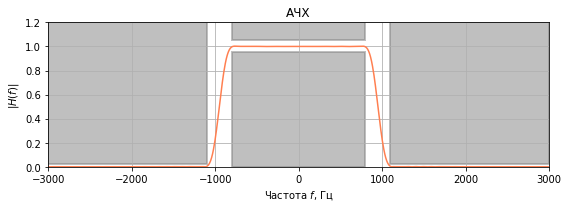

In [ ]:
M = 1024
h = signal.firwin(numtaps=N_init, cutoff=cutoff, width=None, window='hamming', pass_zero='lowpass', fs=fs)
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

0.01841690681242567


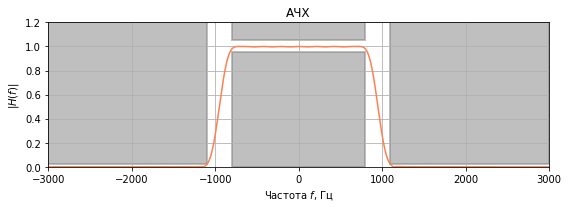

In [ ]:
M = 1024
h = signal.firwin(numtaps=N, cutoff=cutoff, width=None, window='hamming', pass_zero='lowpass', fs=fs)
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
frequencies = fs*(np.arange(M)/M-0.5)
for m in range (len (frequencies)):
    if frequencies[m] >= f2:
        print (H1[m])
        break

plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()


## Задача 2.3. Синтез ФНЧ с окном Кайзера.

Синтезировать КИХ-фильтр нижних частот с окном Кайзера наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Параметр $\beta$ и длину окна $N$ определить по эмпирическим формулам, приведенным в лекции, или с помощью функции `signal.kaiserord`. Привести график АЧХ получившегося фильтра, сравнить порядок с фильтром из задачи 2.2. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.ticker as ticker
import math

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


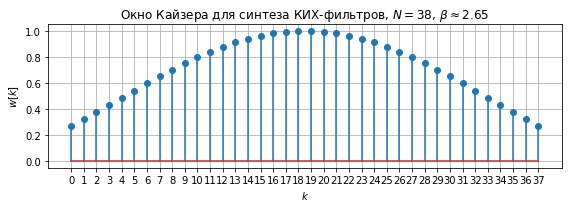

In [ ]:
fs = 6000
f1 = 800
f2 = 1100
delta1 = 0.05
delta2 = 0.02

N, beta = signal.kaiserord (ripple=-20*np.log10(delta2), width=2*(f2-f1)/fs)
w=signal.windows.kaiser(M=N, beta=beta, sym=True)
plt.figure(figsize=[8, 3])
plt.stem(np.arange(w.size),w)
plt.grid()
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.title("Окно Кайзера для синтеза КИХ-фильтров, $N=$%i, $\\beta \\approx $%.2f" %(N, beta))
plt.xticks(np.arange(w.size))
plt.tight_layout()


In [ ]:
cutoff=(f1+f2)/2 
h = signal.firwin(numtaps=N, cutoff=cutoff, window=('kaiser', beta), pass_zero='lowpass', fs=fs)

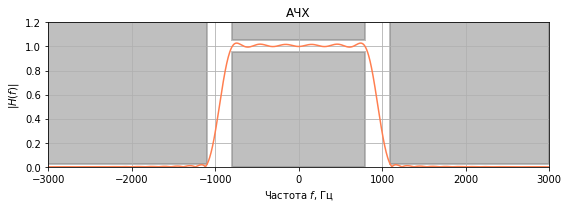

In [ ]:
M=1024
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
print (beta)
print (N)

2.652339138368929
38


38 < 56. Это значит, что окно Кайзера намного круче фильтра Хэмминга (если сравнивать с точки зрения мнимального допустимого N).

#  Модуль 3. Оптимизационные методы синтеза КИХ-фильтров

## Задача 3.1. Метод наименьших квадратов.

Синтезировать КИХ-фильтр методом наименьших квадратов наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.firls`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.ticker as ticker
import math

In [ ]:
def check_eligibility (h, fs, f1, f2, delta1, delta2):
    is_eligible = True
    M = 131072
    H = abs(np.fft.fftshift(np.fft.fft(h, M)))
    frequencies = fs*(np.arange(M)/M-0.5)
    for m in range (len (H)): 
        if 0 <= frequencies[m] <= f1 and (abs (H[m]) > 1 + delta1 or abs (H[m]) < 1 - delta1):
            is_eligible = False
            break
        if frequencies[m] >= f2 and abs (H[m]) > delta2:
            is_eligible = False
            break
    return is_eligible

In [ ]:
fs = 6000
f1 = 800
f2 = 1100
delta1 = 0.05
delta2 = 0.02

N_init = 39
bands = np.array([0, f1, f2, fs/2])
desired = np.array([1, 1, 0, 0])
weight = np.array([delta2 / delta1, 1])

N = N_init
cutoff = (f1 + f2) / 2
h_init = signal.firls(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)

if check_eligibility (h_init, fs, f1, f2, delta1, delta2):
    for N_tmp in range (N - 2, 0, -2):
        h = signal.firls(numtaps=N_tmp, bands=bands, desired=desired, weight=weight, fs=fs)
        if not check_eligibility (h, fs, f1, f2, delta1, delta2):
            N = N_tmp + 2
            break
else:
    for N_tmp in range (N + 2, 100000, 2):
        h = signal.firls(numtaps=N_tmp, bands=bands, desired=desired, weight=weight, fs=fs)
        if check_eligibility (h, fs, f1, f2, delta1, delta2):
            N = N_tmp
            break

print (N)

43


0.01660337543900138


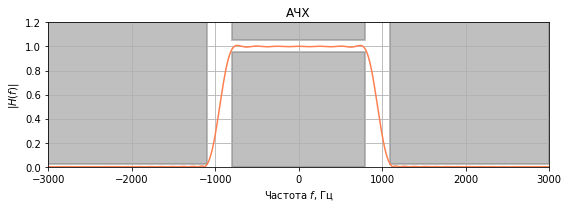

In [ ]:
M = 1024
h = signal.firls(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
frequencies = fs*(np.arange(M)/M-0.5)
for m in range (len (frequencies)):
    if frequencies[m] >= f2:
        print (H1[m])
        break

plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

## Задача 3.2. Метод равномерной чебышевской аппроксимации.

Синтезировать КИХ-фильтр методом равномерной чебышевской аппроксимации наименьшего порядка при заданных требованиях к АЧХ :
* частота дискретизации $f_s$,
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимально допустимое отклонение АЧХ в полосе пропускания $\delta_1$,
* максимально допустимое отклонение АЧХ в полосе задерживания $\delta_2$.

Использовать следующую итерационную процедуру:

1) Выбрать начальный порядок фильтра $R$ (например, можно взять результат решения задачи 2.3).

2) Используя функцию `scipy.signal.remez`, синтезировать КИХ-фильтр порядка $R$ методом наименьших квадратов.

3) Проверить выполнение требований к АЧХ фильтра. Если требования не выпоняются, следует увеличить порядок фильтра $R$ (на некоторое целое число) и перейти на п. 2. Если требования выполняются, то нужно уменьшить порядок фильтра  $R$ и перейти на п. 2. Уменьшение и увеличение порядка производится до тех пор, пока не будет найден минимальный порядок , при котором выполняются требования к АЧХ и уменьшение порядка на единицу приводит к нарушению требований к фильтру. 

Приведите график АЧХ КИХ-фильтра минимального порядка $R_\min$ в итерационной процедуре. 

In [ ]:
fs = 6000
f1 = 800
f2 = 1100
delta1 = 0.05
delta2 = 0.02

N_init = 39
bands = np.array([0, f1, f2, fs/2])
desired = np.array([1, 0])
weight = np.array([delta2 / delta1, 1])

N = N_init
cutoff = (f1 + f2) / 2
h_init = signal.remez(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)

if check_eligibility (h_init, fs, f1, f2, delta1, delta2):
    for N_tmp in range (N - 2, 0, -2):
        h = signal.remez(numtaps=N_tmp, bands=bands, desired=desired, weight=weight, fs=fs)
        if not check_eligibility (h, fs, f1, f2, delta1, delta2):
            N = N_tmp + 2
            break
else:
    for N_tmp in range (N + 2, 100000, 2):
        h = signal.remez(numtaps=N_tmp, bands=bands, desired=desired, weight=weight, fs=fs)
        if check_eligibility (h, fs, f1, f2, delta1, delta2):
            N = N_tmp
            break

print (N)

29


0.017871505758049477


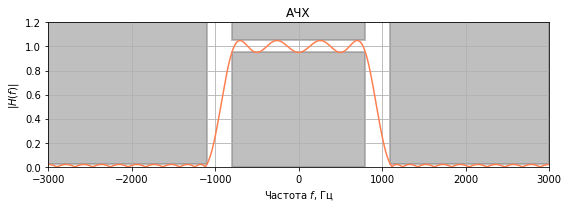

In [ ]:
M = 1024
h = signal.remez(numtaps=N, bands=bands, desired=desired, weight=weight, fs=fs)
H1=abs(np.fft.fftshift(np.fft.fft(h, M)))
frequencies = fs*(np.arange(M)/M-0.5)
for m in range (len (frequencies)):
    if frequencies[m] >= f2:
        print (H1[m])
        break

plt.figure(figsize=[8, 3])
plt.plot(fs*(np.arange(M)/M-0.5), H1, color='coral')
plt.grid()
plt.ylabel('$|H(f)|$')
plt.xlabel('Частота $f$, Гц')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.ylim([0.0, 1.2])
plt.fill([-f1,-f1, f1, f1], [0, 1-delta1, 1-delta1, 0], color='gray', lw=2, alpha=0.5)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([f2,f2, fs/2, fs/2], [delta2, 1.2, 1.2, delta2], color='gray', lw=2, alpha=0.5)
plt.fill([-f1,-f1, f1, f1], [1+delta1, 1.2, 1.2, 1+delta1], color='gray', lw=2, alpha=0.5)
plt.tight_layout()
plt.show()

## Задача 3.3. Сравнение результатов.

Сравнить минимальные порядки КИХ-фильтров, которые получились в задачах 2.2, 2.3, 3.1 и 3.2. Заполнить таблицу.


|                                             	| $$R_\min$$ 	 | $$N_\min$$  |
|---------------------------------------------	|         	 |           |
| Оконный метод (окно Хэмминга)               	|     55     |    56     |
| Оконный метод (окно Кайзера)                	|     37     |    38     |
| Метод наименьших квадратов                  	|     42     |    43     |
| Метод равномерной чебышевской аппроксимации 	|     28     |    29     |

Определить, будут ли выполняться требование из этих задач для фильтра минимального из получившихся порядков, построенного методом частотной выборки (как в задаче 1.2).

Нет. Уже было проверено в пункте 1.2. Мне повезло и там было N = 29.